In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from haggis.math import full_width_half_max

In [46]:
listedesresolution = []
#Le fichier texte doit être sous le format suivant (4 lignes de heading):
#données longueur d'onde \t(tab)  donnée tension \t(tab) donnée attendu(peut être que des 0)

#l'entrée donné est le nom du fichier en 'str'.
def analyse(données):#fonction qui analyse les données et qui les compile dans une liste de tuple, donc ordre d'éxécution important
    filename = données
    data = np.loadtxt(filename, delimiter='\t', skiprows=4, dtype=float)

    data = np.array(data)

    l = np.size(data)

    t = np.arange(0,l*16.6e-3, 16.6e-3)

    x = data[:,0]
    y = data[:,1]

    x = np.array(x)/10
    dx = data[int(l/3-1)][0]- data[0][0]
    x2 = np.linspace(0,dx,int(l/3))
    #fig2 = plt.figure()
    #plt.plot(x2,y*1000,'k')
    #plt.xlabel('nm')
    #plt.ylabel('mV')
    #plt.savefig(filename+'brut.jpg', dpi = 900)
    t = np.arange(0,(l*16.6e-3)/3, 16.6e-3)
 
    sos = signal.butter(5, 10, 'lp', fs=60, output='sos')

    #filtered = signal.sosfilt(sos, y)
    filtered = y

    #fi3 = plt.figure()
    
    fwhm, (x1, y1), (x3, y3) = full_width_half_max(x2, filtered, return_points=True)
    if fwhm < 0:
        fwhm = -fwhm
    print(fwhm)
    listedesresolution.append((filename,fwhm,dx, filtered, (x1, y1), (x3, y3)))

    #plt.plot(x2, filtered*1000, 'k')
    #plt.plot(x1, y1*1000, 'ko')
    #plt.plot(x3, y3*1000, 'ko')
    #plt.xlabel('nm')
    #plt.ylabel('mV')
    #plt.savefig(filename+'filtre.jpg', dpi = 900)

In [47]:
#utilisé la fonction pour chaque fichier texte
#exemple: analyse('data4.txt')
#Les mettre dans l'ordre voulu pour le graphique plus bas
#analyse('datatoanalyse/base_23mai_pm')
#analyse('datatoanalyse/base_24mai')
#analyse('datatoanalyse/newbase_23mai')
analyse('datatoanalyse/-1sur10_23mai_pm')
analyse('datatoanalyse/-1sur10(2)_23mai_pm')
analyse('datatoanalyse/-1sur10(3)_23mai_pm')
analyse('datatoanalyse/-1sur10(4)_23mai_pm')
analyse('datatoanalyse/-1sur10(5)_23mai_pm')
#analyse('datatoanalyse/-1sur10(2)_24mai')
#analyse('datatoanalyse/base_25 mai')
#analyse('datatoanalyse/base25 mai')
#analyse('datatoanalyse/base_25mai_cover')


0.011713201867049189
0.012768475928415499
0.012582977342221191
0.012693241233241705
0.01269783721772573


0.012491146717730663


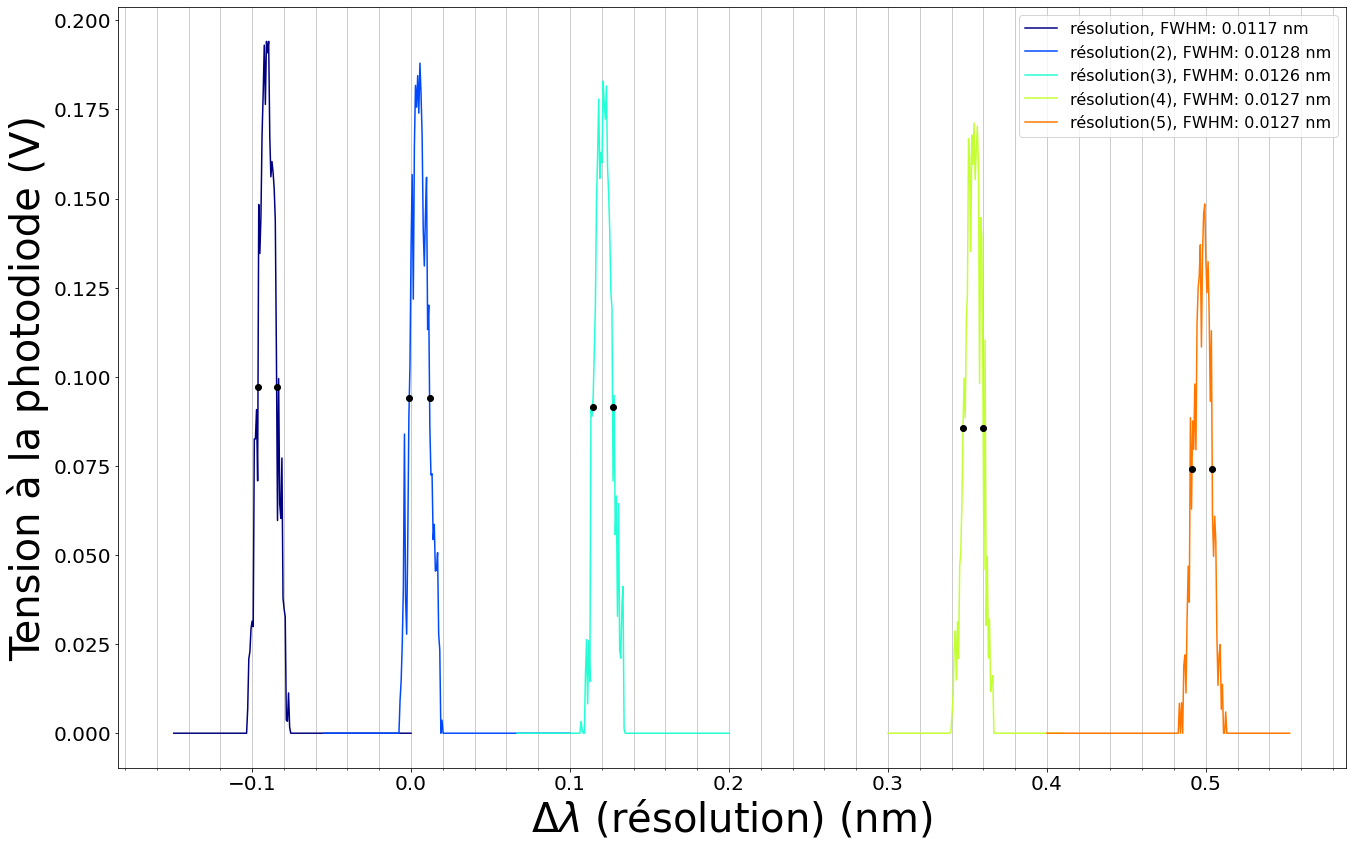

In [48]:
res = np.array(listedesresolution, dtype=object)
#res = sorted(res, key = lambda x: x[1])  #permet de mettre en ordre croissant de FWHM
i = 0
cm = plt.get_cmap('jet')
delta = 0.1 #espacement entre les pics

color = 50

largeur = []
figure = plt.figure()
figure.set_size_inches(22, 14, forward=True)
for p in res:
    l = np.size(p[3])
    x = np.linspace(0,p[2],int(l))+delta*i
    plt.plot(x, p[3], color = cm([i*color]), label = p[0].replace('datatoanalyse/','').replace('.txt','').replace('sur','/').replace('/10', 'résolution')[2:-9]+', FWHM: '+str(round(p[1], 4))+' nm')
    plt.plot(p[4][0]+delta*i, p[4][1], 'ko')
    plt.plot(p[5][0]+delta*i, p[5][1], 'ko')
    largeur.append(p[1])
    i += 1


plt.xlabel("$\Delta \lambda$ (résolution) (nm)")
plt.ylabel("Tension à la photodiode (V)")
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=40)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.02))
plt.rc('grid', linestyle="--", color='black')
plt.grid(visible=True, which='major', axis= 'x', color='k', alpha= 0.25, linestyle='-')
plt.grid(visible=True, which='minor', axis= 'x', color='k', alpha= 0.25, linestyle='-')
plt.legend(loc = 'upper right')
plt.savefig('résolution_bonne.jpg', dpi=600)

print(np.mean(largeur))

plt.show()



